# Starters
## Import Packages

In [1]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
sns.set_style('darkgrid')

## Helpers functions

In [4]:
# Function to quickly describe data
def data_desc(my_imported_data):
    print(my_imported_data.dropna(how = 'all').shape) #pour voir si certaines lignes comportent des valeurs NaN partout (Non)
    print(my_imported_data.shape)
    return(my_imported_data.dtypes)

# Function to return in a dictionary ratio of nan values per variable sorted in descending order
def display_nan_Values(my_imported_data):
    nan_dict = {my_imported_data.columns[var]: my_imported_data.iloc[:,var].isna().mean()
                     for var in range(my_imported_data.shape[1])}
    sorted_dict_by_nanvalues = sorted(nan_dict.items(), key=lambda x:x[1], reverse=True)
    sorted_dict = dict(sorted_dict_by_nanvalues)
    return sorted_dict

# Function for replacing UPPERCASE with lowercase in variables names using title()
def columns_title_format(my_imported_data): 
    data_columns = list(my_imported_data.columns)
    data_columns = [col.title() for col in data_columns]
    print(data_columns)
    my_imported_data.columns = data_columns
    my_imported_data.head()
    return my_imported_data

# Function To project a variable onto a dataframe
def present_variable_in_tab(my_dataset, variable_col, variable_new_name):
    effectifs = my_dataset[variable_col].value_counts()
    modalites = effectifs.index # l'index des effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [variable_new_name]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(my_dataset) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(by=[variable_new_name]) #n would be of use if many values had a on the first column of nutrigrade
    #tab.index = [1, 2, 3 ,4 ,5]
    return(tab)


In [5]:
# Function to estimate percentage of null values for each variable in the dataset
def compute_nan_P(dataset):
    data_isna_P = (dataset.isna().sum()) * 100/len(dataset)
    cols = [x for x in range (dataset.shape[1])]
    count =0
    for ii in data_isna_P.index:
        count +=1
        if (data_isna_P[ii] > 55):
            #countna = +1
            cols.remove(count-1)
            print (ii)
        else:
            continue
    return (data_isna_P, cols)

In [6]:
# Function to compute linear regression
def iterate_regression(X, y):
    Lr = LinearRegression()

    # step1(): train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)        
    plt.scatter(x_train, y_train, label = 'Training data', color = 'red', alpha=.7)
    plt.scatter (x_test, y_test, label ='Testing data', color ='g', alpha=.7)
    plt.legend()
    plt.title('Test Train Split')
    plt.show()
    # step2(): fit
    Lr.fit(x_train.values.reshape(-1, 1), y_train.values)
    # step3(): predict
    prediction = Lr.predict(x_test.values.reshape(-1, 1))
    plt.plot(x_test, prediction, label ='Linear Regression', color ='b')
    plt.scatter(x_test, y_test, label ='Test data', color ='g', alpha=.7)
    plt.legend()
    plt.show()
    # step 4: Compute score 
    FirstReg_score = Lr.score(x_test.values.reshape(-1, 1), y_test.values)
    Lr.get_params(deep=True)

In [7]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


In [8]:
# Function to display fcatorial planes
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

## Import data

In [9]:
imported_data=pd.read_csv("/Users/souha_kassab/OC_project3/static/csv/2016_Building_Energy_Benchmarking.csv", decimal='.', low_memory=False)

In [10]:
## Check dtypes & NaN Values 
data_desc(imported_data)

(3376, 46)
(3376, 46)


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

# Data preparation
## First glance

In [11]:
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [12]:
# Formating columns titles
columns_title_format(imported_data)

['Osebuildingid', 'Datayear', 'Buildingtype', 'Primarypropertytype', 'Propertyname', 'Address', 'City', 'State', 'Zipcode', 'Taxparcelidentificationnumber', 'Councildistrictcode', 'Neighborhood', 'Latitude', 'Longitude', 'Yearbuilt', 'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking', 'Propertygfabuilding(S)', 'Listofallpropertyusetypes', 'Largestpropertyusetype', 'Largestpropertyusetypegfa', 'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa', 'Thirdlargestpropertyusetype', 'Thirdlargestpropertyusetypegfa', 'Yearsenergystarcertified', 'Energystarscore', 'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)', 'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)', 'Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 'Electricity(Kwh)', 'Electricity(Kbtu)', 'Naturalgas(Therms)', 'Naturalgas(Kbtu)', 'Defaultdata', 'Comments', 'Compliancestatus', 'Outlier', 'Totalghgemissions', 'Ghgemissionsintensity']


,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [13]:
## How many unique values per entry?
imported_data.nunique()

Osebuildingid                      3376
Datayear                              1
Buildingtype                          8
Primarypropertytype                  24
Propertyname                       3362
Address                            3354
City                                  1
State                                 1
Zipcode                              55
Taxparcelidentificationnumber      3268
Councildistrictcode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
Yearbuilt                           113
Numberofbuildings                    17
Numberoffloors                       50
Propertygfatotal                   3195
Propertygfaparking                  496
Propertygfabuilding(S)             3193
Listofallpropertyusetypes           466
Largestpropertyusetype               56
Largestpropertyusetypegfa          3122
Secondlargestpropertyusetype         50
Secondlargestpropertyusetypegfa    1352


In [14]:
imported_data[imported_data.duplicated()].shape

(0, 46)

In [15]:
## Check for duplicates at same address
print('Number of buildings with different Id but at the same location is',
      imported_data['Address'].duplicated().sum())
ppty_at_same_address = imported_data[(imported_data['Address'].duplicated())
                                    & imported_data['Propertyname'].duplicated()]
ppty_at_same_address

Number of buildings with different Id but at the same location is 22


,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity


In [16]:
#check for duplicated property name
print('Number of buildings with different Id but at the same location is',
      imported_data['Propertyname'].duplicated().sum())
same_ppty_name = imported_data[(imported_data['Propertyname'].duplicated())
                               & (imported_data['Address'].is_unique==False)]
same_ppty_name['Propertyname']

Number of buildings with different Id but at the same location is 14


1324                      Lakeview
1462                    South Park
1556                  Central Park
1566                Canal Building
1574       Garden Court Apartments
1644               Northgate Plaza
1800                      Fairview
1965              Bayview Building
1968                   Airport Way
2081    Jefferson Court Apartments
2367                      Parkside
2609               Northgate Plaza
2966          Crestview Apartments
3266                 Pine Building
Name: Propertyname, dtype: object

In [17]:
bldngs_same_name = imported_data[imported_data['Numberofbuildings']==0]
bldngs_same_name

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity
63,89,2016,NonResidential,Medical Office,Polyclinic North && South,1200 Harvard Ave,Seattle,WA,98122.0,1978201270,...,2.897563e+06,9886484.0,68145.703130,6814570.0,False,NaN,Compliant,NaN,430.84,2.41
76,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,401 Mercer St,Seattle,WA,98109.0,1988200705,...,1.221074e+06,4166305.0,0.000000,0.0,False,NaN,Compliant,NaN,29.04,0.44
160,257,2016,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,3235 16TH AVE SW,Seattle,WA,98134.0,7666703020,...,7.067415e+05,2411402.0,0.000000,0.0,False,NaN,Compliant,NaN,16.81,0.21
201,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,Seattle,WA,98121.0,0656000005,...,2.868908e+06,9788716.0,0.000000,0.0,False,NaN,Compliant,NaN,68.24,0.68
241,366,2016,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,1107 NE 45th St,Seattle,WA,98105.0,1142000500,...,8.391593e+05,2863212.0,18652.765630,1865277.0,False,NaN,Compliant,NaN,119.03,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,49729,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Oakwood SeattleSouth LakeUnion (Hue),717 Dexter Ave North,Seattle,WA,98109.0,2249000255,...,4.798908e+05,1637387.0,14265.820310,1426582.0,False,NaN,Compliant,NaN,87.18,0.73
3202,49779,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Ernestine Anderson Place,2010 S Jackson Street,Seattle,WA,98144.0,3319501010,...,4.183712e+05,1427482.0,0.000000,0.0,False,NaN,Compliant,NaN,9.95,0.26
3205,49783,2016,NonResidential,Laboratory,UW Medicine Phase 3.1,750 Republican Street,Seattle,WA,98109.0,1988201435,...,7.154222e+06,24410204.0,172862.562500,17286256.0,False,NaN,Compliant,NaN,1088.25,3.20
3232,49862,2016,Nonresidential COS,Other,SCT Technical Pavilion,201 Thomas St.,Seattle,WA,98109.0,1985200130,...,4.703133e+05,1604709.0,8245.049805,824505.0,False,NaN,Compliant,NaN,54.98,1.90


In [18]:
imported_data[imported_data['Address']=='1100 Olive Way']

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity
245,370,2016,NonResidential,Large Office,Metropolitan Park West,1100 Olive Way,Seattle,WA,98101.0,0660002054,...,7099908.00,24224886.0,0.0,0.0,False,NaN,Compliant,NaN,168.88,0.41
697,19654,2016,NonResidential,Laboratory,1100 Olive Lab,1100 Olive Way,Seattle,WA,98101.0,0660002030,...,2125318.75,7251588.0,0.0,0.0,False,NaN,Compliant,NaN,50.55,1.13


## Data cleaning

In [19]:
## Percentage of Nan values per variable
display_nan_Values(imported_data)

{'Comments': 1.0,
 'Outlier': 0.990521327014218,
 'Yearsenergystarcertified': 0.9647511848341233,
 'Thirdlargestpropertyusetype': 0.8234597156398105,
 'Thirdlargestpropertyusetypegfa': 0.8234597156398105,
 'Secondlargestpropertyusetype': 0.5026658767772512,
 'Secondlargestpropertyusetypegfa': 0.5026658767772512,
 'Energystarscore': 0.2497037914691943,
 'Largestpropertyusetype': 0.005924170616113744,
 'Largestpropertyusetypegfa': 0.005924170616113744,
 'Zipcode': 0.004739336492890996,
 'Listofallpropertyusetypes': 0.002665876777251185,
 'Sourceeui(Kbtu/Sf)': 0.002665876777251185,
 'Sourceeuiwn(Kbtu/Sf)': 0.002665876777251185,
 'Steamuse(Kbtu)': 0.002665876777251185,
 'Electricity(Kwh)': 0.002665876777251185,
 'Electricity(Kbtu)': 0.002665876777251185,
 'Naturalgas(Therms)': 0.002665876777251185,
 'Naturalgas(Kbtu)': 0.002665876777251185,
 'Totalghgemissions': 0.002665876777251185,
 'Ghgemissionsintensity': 0.002665876777251185,
 'Numberofbuildings': 0.002369668246445498,
 'Siteeui(Kbtu/

In [20]:
## Drop nan columns
imported_data.drop('Comments', axis =1, inplace=True)

In [21]:
dict_of_nan_values = display_nan_Values(imported_data)
desc_list = list()
val_list = list()
for n in range(len(dict_of_nan_values)):
    desc_list.append(list(dict_of_nan_values.keys())[n])
    val_list.append(list(dict_of_nan_values.values())[n])

In [ ]:
val_list

In [ ]:
#list(dict_of_nan_values.keys())[1]
#desc_list[5]
#desc_data['Variables'] = desc_list
type(desc_data)
#desc_data = pd.DataFrame(pd.Series(desc_list))
desc_data
#desc_data['Variables'] = pd.Series(desc_list)

In [ ]:
imported_data.head()

# Data description 

In [25]:
imported_data.columns

Index(['Osebuildingid', 'Datayear', 'Buildingtype', 'Primarypropertytype',
       'Propertyname', 'Address', 'City', 'State', 'Zipcode',
       'Taxparcelidentificationnumber', 'Councildistrictcode', 'Neighborhood',
       'Latitude', 'Longitude', 'Yearbuilt', 'Numberofbuildings',
       'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking',
       'Propertygfabuilding(S)', 'Listofallpropertyusetypes',
       'Largestpropertyusetype', 'Largestpropertyusetypegfa',
       'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa',
       'Thirdlargestpropertyusetype', 'Thirdlargestpropertyusetypegfa',
       'Yearsenergystarcertified', 'Energystarscore', 'Siteeui(Kbtu/Sf)',
       'Siteeuiwn(Kbtu/Sf)', 'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)',
       'Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)',
       'Electricity(Kwh)', 'Electricity(Kbtu)', 'Naturalgas(Therms)',
       'Naturalgas(Kbtu)', 'Defaultdata', 'Compliancestatus', 'Outlier',
       'Totalghg

In [26]:
[nan_data, data_cols] = compute_nan_P(imported_data)

Thirdlargestpropertyusetype
Thirdlargestpropertyusetypegfa
Yearsenergystarcertified
Outlier


In [27]:
first_dataset = imported_data.iloc[:, data_cols]
data_desc(first_dataset)
# -------------------------------------------------------------------------------

(3376, 41)
(3376, 41)


Osebuildingid                        int64
Datayear                             int64
Buildingtype                        object
Primarypropertytype                 object
Propertyname                        object
Address                             object
City                                object
State                               object
Zipcode                            float64
Taxparcelidentificationnumber       object
Councildistrictcode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Yearbuilt                            int64
Numberofbuildings                  float64
Numberoffloors                       int64
Propertygfatotal                     int64
Propertygfaparking                   int64
Propertygfabuilding(S)               int64
Listofallpropertyusetypes           object
Largestpropertyusetype              object
Largestpropertyusetypegfa          float64
Secondlarge

In [28]:
Nan_ghg_emissions = first_dataset[first_dataset['Totalghgemissions'].isna()==True]
Nan_ghg_emissions

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
758,19798,2016,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,7239 SAND POINT WAY NE,Seattle,WA,98115.0,0225049032,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
1768,23355,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,6040 CALIFORNIA AVE SW,Seattle,WA,98136.0,7625703280,...,5.937986e+05,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
1792,23437,2016,Multifamily LR (1-4),Low-Rise Multifamily,MERCER CREST APT,500 W MERCER ST,Seattle,WA,98119.0,3876900230,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
2321,25431,2016,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,5625 15TH AVE NE,Seattle,WA,98105.0,5226300030,...,7.975070e+05,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
2474,25752,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRANVIEW APARTMENTS,1120 N 93RD ST,Seattle,WA,98103.0,9267200155,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
2480,25763,2016,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,1520 CALIFORNIA AVE SW,Seattle,WA,98116.0,9272201340,...,1.126782e+06,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0,8816401120,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN
3348,50082,2016,Multifamily LR (1-4),Low-Rise Multifamily,STREAM FIFTEEN,605 15TH AVE E,Seattle,WA,98112.0,3303700030,...,8.576127e+05,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN


In [30]:
first_dataset = first_dataset.drop(Nan_ghg_emissions.index, axis=0)

In [31]:
first_dataset.isna().sum()

Osebuildingid                         0
Datayear                              0
Buildingtype                          0
Primarypropertytype                   0
Propertyname                          0
Address                               0
City                                  0
State                                 0
Zipcode                              16
Taxparcelidentificationnumber         0
Councildistrictcode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
Yearbuilt                             0
Numberofbuildings                     0
Numberoffloors                        0
Propertygfatotal                      0
Propertygfaparking                    0
Propertygfabuilding(S)                0
Listofallpropertyusetypes             0
Largestpropertyusetype               11
Largestpropertyusetypegfa            11
Secondlargestpropertyusetype       1688
Secondlargestpropertyusetypegfa    1688


In [ ]:
first_dataset.loc[first_dataset['Totalghgemissions']>10000]

In [ ]:
first_dataset.groupby('Numberoffloors').mean()

In [32]:
# 5.1.
## 5.1.1. Discrete quantitative variable
## Projection on a table for study of empirical distribution
Total_GHG_emission_projection = present_variable_in_tab(first_dataset, 
                                                'Totalghgemissions', 'bldg_total_emi')
Total_GHG_emission_projection.index = np.arange(1,len(Total_GHG_emission_projection)+1)
Year_projection = present_variable_in_tab(first_dataset, 'Yearbuilt', 
                                                        'Construction_year')
Year_projection.index = np.arange(1,len(Year_projection)+1)


In [33]:
pd.crosstab(Year_projection['Construction_year'], Total_GHG_emission_projection.bldg_total_emi, dropna=True)

bldg_total_emi,-0.80,0.00,0.09,0.12,0.17,0.31,0.40,0.50,0.63,0.68,...,3.52,3.53,3.54,3.55,3.56,3.58,3.62,3.63,3.64,3.65
Construction_year,,,,,,,,,,,,,,,,,,,,,
1900,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1903,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Replace space by an "_" in first_dataset values
df = first_dataset.select_dtypes(include=['object'])
df = df.stack().str.replace(' ', '_').unstack()
df

,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Taxparcelidentificationnumber,Neighborhood,Listofallpropertyusetypes,Largestpropertyusetype,Secondlargestpropertyusetype,Compliancestatus
0,NonResidential,Hotel,Mayflower_park_hotel,405_Olive_way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,Compliant
1,NonResidential,Hotel,Paramount_Hotel,724_Pine_street,Seattle,WA,0659000220,DOWNTOWN,"Hotel,_Parking,_Restaurant",Hotel,Parking,Compliant
2,NonResidential,Hotel,5673-The_Westin_Seattle,1900_5th_Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,Compliant
3,NonResidential,Hotel,HOTEL_MAX,620_STEWART_ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,Compliant
4,NonResidential,Hotel,WARWICK_SEATTLE_HOTEL_(ID8),401_LENORA_ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel,_Parking,_Swimming_Pool",Hotel,Parking,Compliant
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential_COS,Office,Horticulture_building,1600_S_Dakota_St,Seattle,WA,1624049080,GREATER_DUWAMISH,Office,Office,NaN,Error_-_Correct_Default_Data
3372,Nonresidential_COS,Other,International_district/Chinatown_CC,719_8th_Ave_S,Seattle,WA,3558300000,DOWNTOWN,Other_-_Recreation,Other_-_Recreation,NaN,Compliant
3373,Nonresidential_COS,Other,Queen_Anne_Pool,1920_1st_Ave_W,Seattle,WA,1794501150,MAGNOLIA_/_QUEEN_ANNE,"Fitness_Center/Health_Club/Gym,_Other_-_Recrea...",Other_-_Recreation,Fitness_Center/Health_Club/Gym,Compliant
3374,Nonresidential_COS,Mixed_Use_Property,South_Park_Community_Center,8319_8th_Ave_S,Seattle,WA,7883603155,GREATER_DUWAMISH,"Fitness_Center/Health_Club/Gym,_Food_Service,_...",Other_-_Recreation,Fitness_Center/Health_Club/Gym,Compliant


In [35]:
#verif format
first_dataset_modif = first_dataset.copy()
first_dataset_modif.loc[:, df.columns] = df[:]
first_dataset_modif

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower_park_hotel,405_Olive_way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount_Hotel,724_Pine_street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The_Westin_Seattle,1900_5th_Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL_MAX,620_STEWART_ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK_SEATTLE_HOTEL_(ID8),401_LENORA_ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential_COS,Office,Horticulture_building,1600_S_Dakota_St,Seattle,WA,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error_-_Correct_Default_Data,20.94,1.70
3372,50223,2016,Nonresidential_COS,Other,International_district/Chinatown_CC,719_8th_Ave_S,Seattle,WA,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential_COS,Other,Queen_Anne_Pool,1920_1st_Ave_W,Seattle,WA,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential_COS,Mixed_Use_Property,South_Park_Community_Center,8319_8th_Ave_S,Seattle,WA,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


In [36]:
first_dataset.loc[:, df.columns] = df[:]
first_dataset.head()

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower_park_hotel,405_Olive_way,Seattle,WA,98101.0,0659000030,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount_Hotel,724_Pine_street,Seattle,WA,98101.0,0659000220,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The_Westin_Seattle,1900_5th_Avenue,Seattle,WA,98101.0,0659000475,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL_MAX,620_STEWART_ST,Seattle,WA,98101.0,0659000640,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK_SEATTLE_HOTEL_(ID8),401_LENORA_ST,Seattle,WA,98121.0,0659000970,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [37]:
first_dataset.describe(include='all')

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
count,3367.000000,3367.0,3367,3367,3367,3367,3367,3367,3351.000000,3367,...,3.366000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367,3367,3367.000000,3367.000000
unique,NaN,NaN,8,24,3353,3345,1,1,NaN,3259,...,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise_Multifamily,Northgate_Plaza,309_South_Cloverdale_Street,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
freq,NaN,NaN,1458,980,3,4,3367,3367,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,3254,3207,NaN,NaN
mean,21200.068607,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.960310,NaN,...,5.281993e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,119.723971,1.175916
std,12223.685751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.631827,NaN,...,1.594752e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,-0.800000,-0.020000
25%,19990.500000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,9.737943e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,9.495000,0.210000
50%,23109.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,1.907221e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,33.920000,0.610000
75%,25994.500000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,4.383889e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,93.940000,1.370000


# One-variant empirical distribution

[Text(0, 0, '980'),
 Text(0, 0, '564'),
 Text(0, 0, '292'),
 Text(0, 0, '256'),
 Text(0, 0, '187'),
 Text(0, 0, '173'),
 Text(0, 0, '139'),
 Text(0, 0, '132'),
 Text(0, 0, '105'),
 Text(0, 0, '91'),
 Text(0, 0, '77'),
 Text(0, 0, '71'),
 Text(0, 0, '53'),
 Text(0, 0, '45'),
 Text(0, 0, '40'),
 Text(0, 0, '39'),
 Text(0, 0, '28'),
 Text(0, 0, '25'),
 Text(0, 0, '23'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '3')]

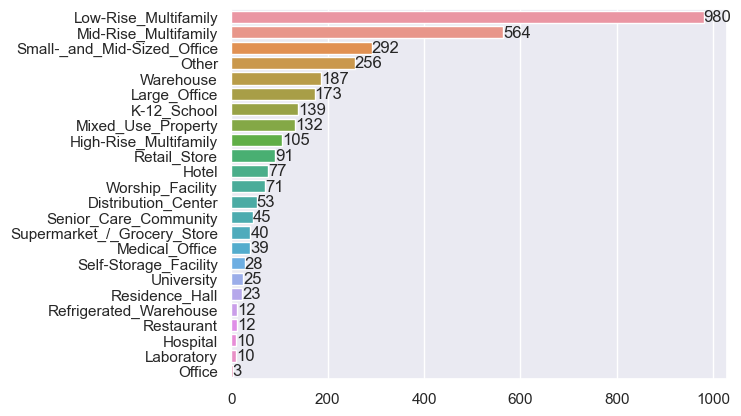

In [38]:
# 5.1.2. Nominal or ordinal Qualitative variable --> bar or pie plots,
## bar plots with SEABORN alternative
count_qualiVar = first_dataset['Primarypropertytype'].value_counts()
#count_qualiVar.values.sort()
#count_qualiVar.index
ax = sns.barplot(y=count_qualiVar.index, x=count_qualiVar.values)
ax.bar_label(ax.containers[0])
#plt.show()
# equvalent a un countplot()

In [39]:
def is_family(item):
    return "multifamily" in item or "Multifamily" in item

In [40]:
first_dataset.shape

(3367, 41)

In [41]:
first_dataset.duplicated().sum()

0

In [42]:
indextodrop = first_dataset[first_dataset['Primarypropertytype'].map(is_family)].index
first_dataset.drop(indextodrop, axis=0, inplace=True)

In [43]:
first_dataset[first_dataset['Primarypropertytype'].map(is_family)].index
first_dataset

      Osebuildingid  Datayear        Buildingtype Primarypropertytype  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential_COS              Office   
3372          50223      2016  Nonresidential_COS               Other   
3373          50224      2016  Nonresidential_COS               Other   
3374          50225      2016  Nonresidential_COS  Mixed_Use_Property   
3375          50226      2016  Nonresidential_COS  Mixed_Use_Property   

                             Propertyname           Address     City State  \
0                    Mayflower_park_hotel    

In [44]:
len(first_dataset)/len(imported_data)*100

50.88862559241706

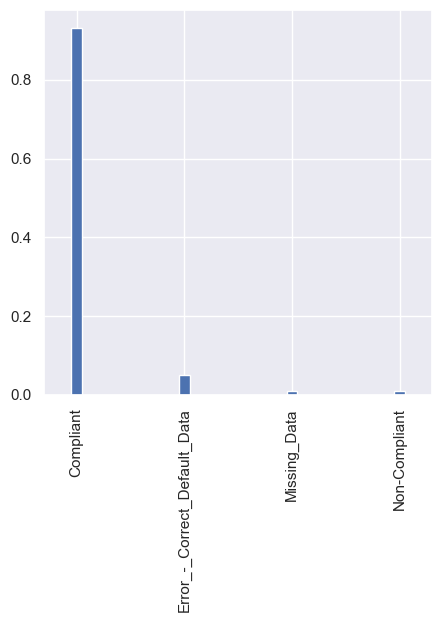

In [45]:
## Diagramme en bâtons
plt.figure(figsize=(5,5))
first_dataset['Compliancestatus'].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

## Analysis of GHG emissions
### Analysis of central tendencies

--------------------
Compliant
moy:
 1.657786116322702
med:
 0.88
mod:
 0    0.23
1    0.28
Name: Ghgemissionsintensity, dtype: float64
var:
 5.678157950501427
ect:
 2.3828885728253066


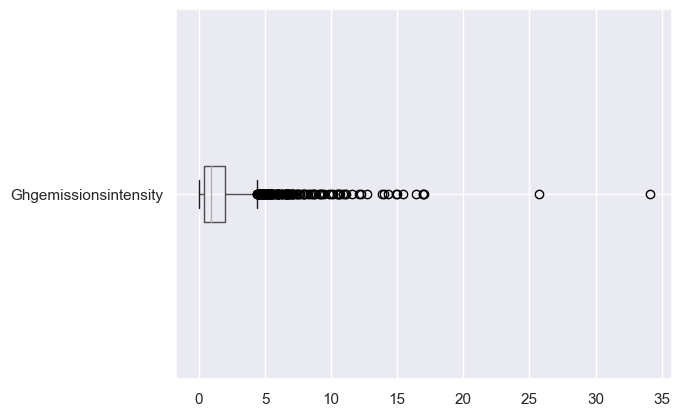

--------------------
Error_-_Correct_Default_Data
moy:
 0.972921348314607
med:
 0.91
mod:
 0    0.51
Name: Ghgemissionsintensity, dtype: float64
var:
 0.3231802297689685
ect:
 0.5684894280186471


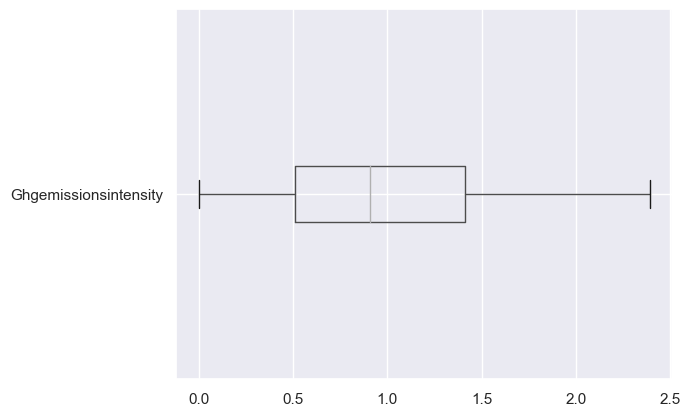

--------------------
Missing_Data
moy:
 0.5066666666666666
med:
 0.2
mod:
 0    0.0
Name: Ghgemissionsintensity, dtype: float64
var:
 0.4561022222222222
ect:
 0.6753534054272786


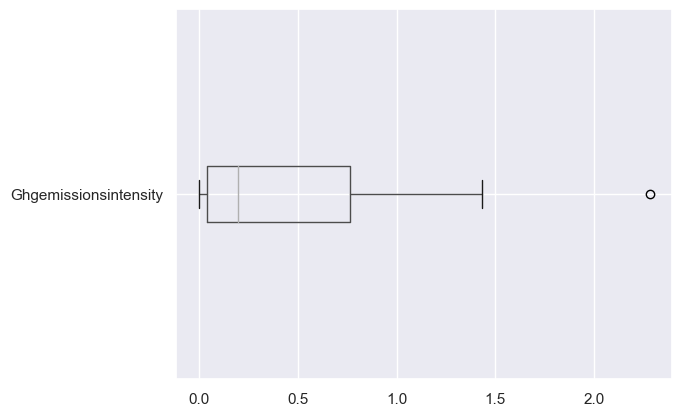

--------------------
Non-Compliant
moy:
 0.30066666666666664
med:
 0.04
mod:
 0    0.0
Name: Ghgemissionsintensity, dtype: float64
var:
 0.3567395555555554
ect:
 0.5972767830374419


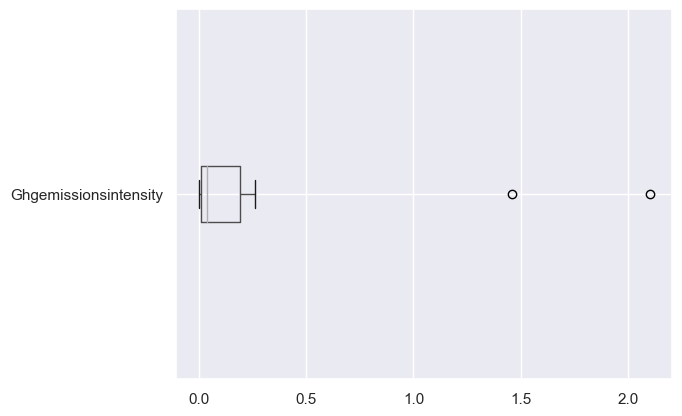

In [46]:
# 5.2. Representing continuous quantitative variables 
# 5.2.1. Central tendency analysis & dispersion measurements
for cat in first_dataset['Compliancestatus'].unique():
    subset = first_dataset.loc[first_dataset['Compliancestatus'] == cat, :] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['Ghgemissionsintensity'].mean())
    print("med:\n",subset['Ghgemissionsintensity'].median())
    print("mod:\n",subset['Ghgemissionsintensity'].mode())
    print("var:\n",subset['Ghgemissionsintensity'].var(ddof=0))
    print("ect:\n",subset['Ghgemissionsintensity'].std(ddof=0))
    #subset["Ghgemissionsintensity"].value_counts(normalize=True).plot(kind='bar',width=0.1)
    #plt.show()
    subset.boxplot(column="Ghgemissionsintensity", showfliers = True, vert=False)
    plt.show()


Handling outliers

In [47]:
outliers_ghgemissionintensity = first_dataset.loc[(first_dataset['Compliancestatus']== 'Compliant') & (first_dataset['Ghgemissionsintensity']>5)]

In [48]:
first_dataset=first_dataset.drop(35, axis=0)

In [49]:
outliers_ghgemissionintensity.index

Int64Index([  12,   14,   35,   47,   59,   60,   98,  119,  124,  136,
            ...
            3171, 3182, 3187, 3198, 3254, 3264, 3339, 3365, 3367, 3373],
           dtype='int64', length=108)

In [ ]:
first_dataset.drop(outliers_ghgemissionintensity.index, axis=0, inplace=True)

In [ ]:
first_dataset.shape

<Figure size 800x800 with 0 Axes>

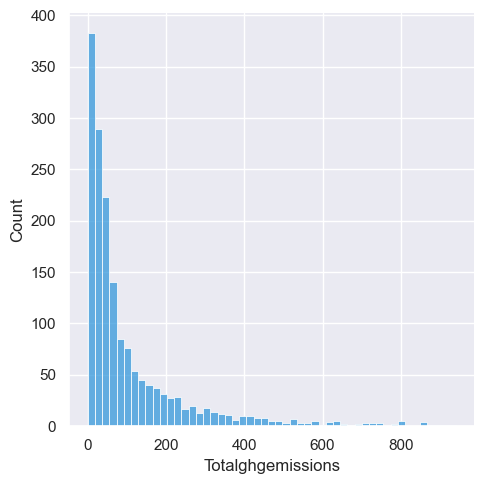

In [51]:
# -------------------------------------------------------------------------------
# 5.2.2. Representing continuous variables using histograms
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(first_dataset[first_dataset.Totalghgemissions <1000]["Totalghgemissions"], kde=False)
plt.show()
# -------------------------------------------------------------------------------

<Figure size 800x800 with 0 Axes>

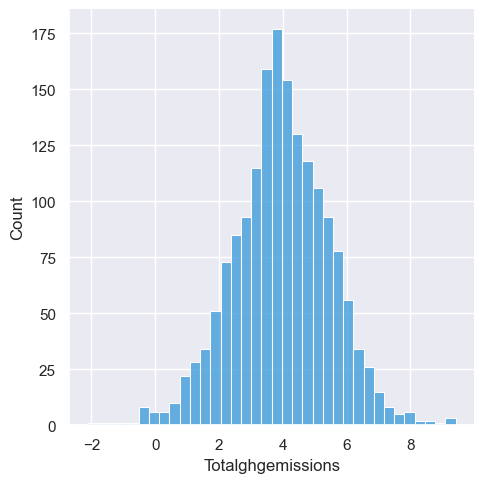

In [52]:
# -------------------------------------------------------------------------------
# 5.2.2. Representing continuous variables using histograms
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
x = np.log(first_dataset[first_dataset.Totalghgemissions > 0]["Totalghgemissions"])
sns.displot(x, kde=False)
plt.show()
# -------------------------------------------------------------------------------

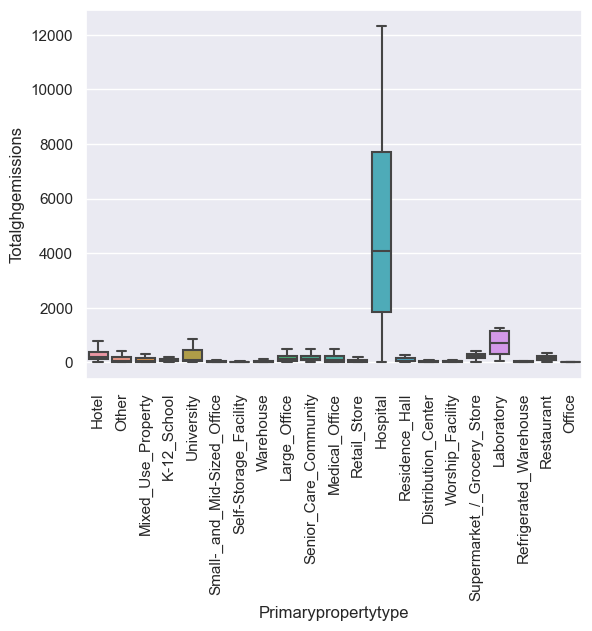

In [53]:
# -------------------------------------------------------------------------------
sns.boxplot(x='Primarypropertytype', y="Totalghgemissions", data=first_dataset, 
               showfliers = False)
plt.xticks(rotation=90)
plt.show()

## Analysis of source consumption

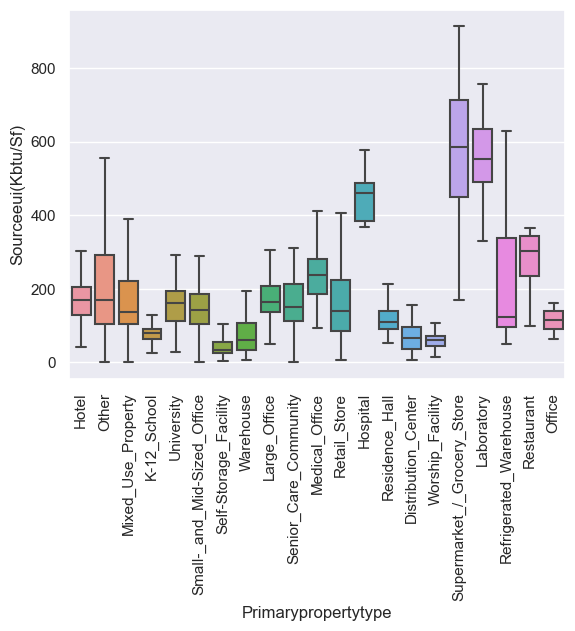

In [54]:
sns.boxplot(x='Primarypropertytype', y="Sourceeui(Kbtu/Sf)", data=first_dataset, 
               showfliers = False)
plt.xticks(rotation=90)
plt.show()

In [55]:
first_dataset.head()

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower_park_hotel,405_Olive_way,Seattle,WA,98101.0,0659000030,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount_Hotel,724_Pine_street,Seattle,WA,98101.0,0659000220,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The_Westin_Seattle,1900_5th_Avenue,Seattle,WA,98101.0,0659000475,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL_MAX,620_STEWART_ST,Seattle,WA,98101.0,0659000640,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK_SEATTLE_HOTEL_(ID8),401_LENORA_ST,Seattle,WA,98121.0,0659000970,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


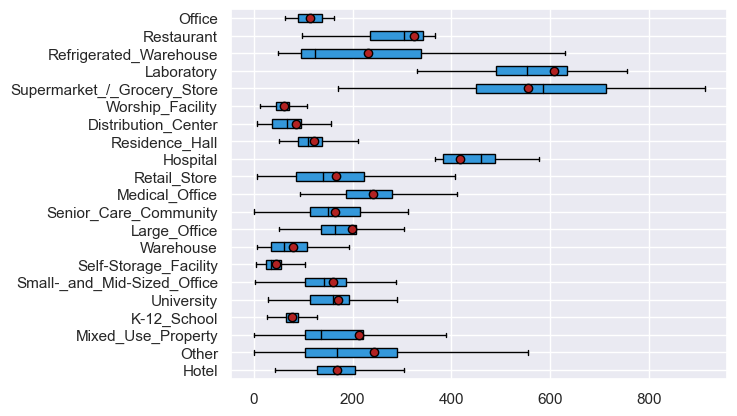

In [59]:
X = "Primarypropertytype" # qualitative
Y = "Sourceeui(Kbtu/Sf)" # quantitative
modalites = first_dataset[X].unique()
groupes = []
for m in modalites:
    groupes.append(first_dataset[first_dataset[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [60]:
first_dataset.columns

Index(['Osebuildingid', 'Datayear', 'Buildingtype', 'Primarypropertytype',
       'Propertyname', 'Address', 'City', 'State', 'Zipcode',
       'Taxparcelidentificationnumber', 'Councildistrictcode', 'Neighborhood',
       'Latitude', 'Longitude', 'Yearbuilt', 'Numberofbuildings',
       'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking',
       'Propertygfabuilding(S)', 'Listofallpropertyusetypes',
       'Largestpropertyusetype', 'Largestpropertyusetypegfa',
       'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa',
       'Energystarscore', 'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)',
       'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)', 'Siteenergyuse(Kbtu)',
       'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 'Electricity(Kwh)',
       'Electricity(Kbtu)', 'Naturalgas(Therms)', 'Naturalgas(Kbtu)',
       'Defaultdata', 'Compliancestatus', 'Totalghgemissions',
       'Ghgemissionsintensity'],
      dtype='object')

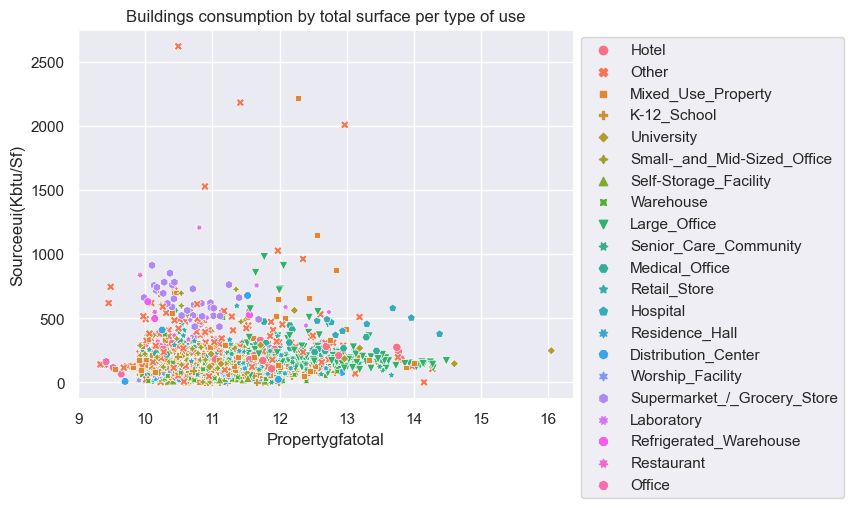

In [66]:
##seaborn alternative:
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
x = np.log(first_dataset.loc[:,'Propertygfatotal'])
 
sns.scatterplot(data=first_dataset, y='Sourceeui(Kbtu/Sf)', x=x, 
                hue='Primarypropertytype', style='Primarypropertytype')
plt.title('Buildings consumption by total surface per type of use')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

## Jointplot

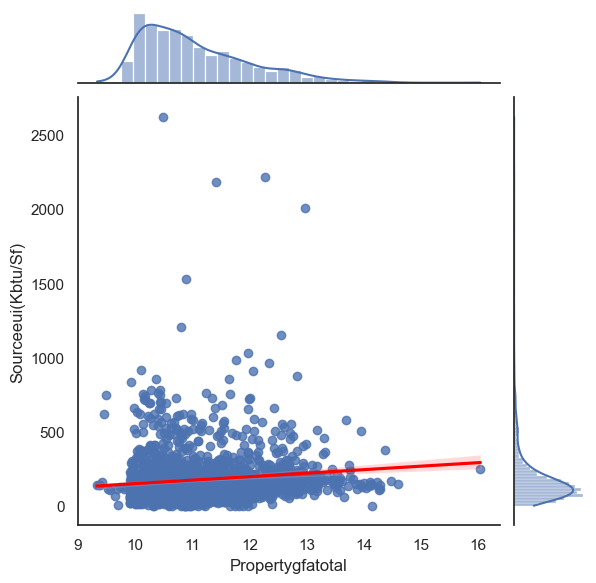

In [72]:
log_surface = np.log(first_dataset.loc[:,'Propertygfatotal'])
# ---------------------------------------------------------------------------
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset, 
              y='Sourceeui(Kbtu/Sf)',
              x=log_surface, kind = 'reg', line_kws={'color': 'red'})
plt.show()

a good graph

In [ ]:
#log_ghgemissions = np.log(abs(first_dataset.loc[:,'Ghgemissionsintensity']))
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset[first_dataset['Sourceeui(Kbtu/Sf)']<=1000], x='Sourceeui(Kbtu/Sf)',
              y='Ghgemissionsintensity', kind = 'reg', line_kws={'color': 'red'})
plt.show()

## Pairplot

In [73]:
my_cols = ['Yearbuilt', 'Sourceeui(Kbtu/Sf)', 'Propertygfatotal', 
           'Primarypropertytype']
#treatment of columns titles>> tolower
explored_dataset = first_dataset[my_cols]
explored_dataset.head()

,Yearbuilt,Sourceeui(Kbtu/Sf),Propertygfatotal,Primarypropertytype
0,1927,182.500000,88434,Hotel
1,1996,176.100006,103566,Hotel
2,1969,241.899994,956110,Hotel
3,1926,216.199997,61320,Hotel
4,1980,211.399994,175580,Hotel


In [74]:
explored_dataset.describe(include='all')

,Yearbuilt,Sourceeui(Kbtu/Sf),Propertygfatotal,Primarypropertytype
count,1717.000000,1717.000000,1.717000e+03,1717
unique,NaN,NaN,NaN,21
top,NaN,NaN,NaN,Small-_and_Mid-Sized_Office
freq,NaN,NaN,NaN,292
mean,1962.686080,173.931683,1.191371e+05,NaN
std,32.907724,183.496118,2.940119e+05,NaN
min,1900.000000,0.000000,1.128500e+04,NaN
25%,1930.000000,77.300003,2.987400e+04,NaN
50%,1966.000000,129.000000,5.001700e+04,NaN
75%,1990.000000,199.699997,1.082450e+05,NaN


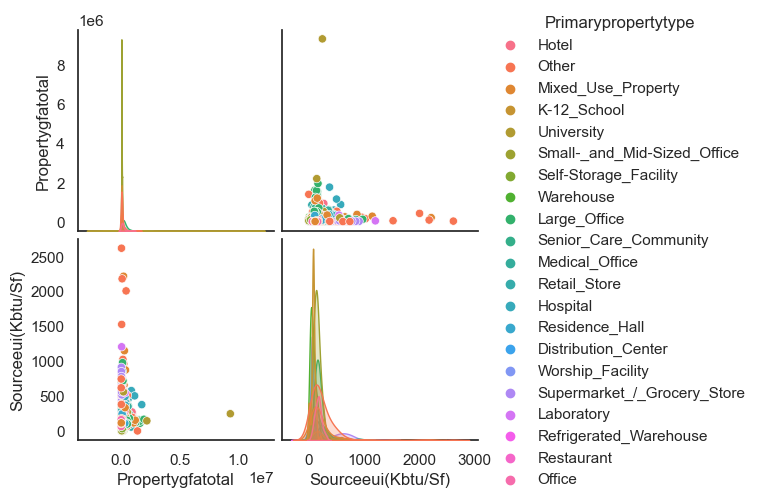

In [78]:
## Looking for correlated variables
#pairplot_data = explored_dataset.drop(columns = ['Yearbuilt', 'Prim'])
sns.pairplot(data=explored_dataset, hue = 'Primarypropertytype',
vars=['Propertygfatotal', 'Sourceeui(Kbtu/Sf)'], height = 2.5 )
sns.set_style('ticks')

In [ ]:
## Looking for correlated variables
pairplot_data = explored_dataset.drop(columns = ['Yearbuilt'])
sns.pairplot(data=pairplot_data, hue = 'Primarypropertytype', height = 2.5 )
sns.set_style('ticks')

# Exploratory Analysis

## Data selection

## Data split

In [ ]:
## Data split
X = explored_dataset.iloc[:, :-1].values
#first_7dataset.iloc[:, -3]
X[:5]

In [ ]:
X.shape

In [ ]:
#get samples identity
names = explored_dataset['Primarypropertytype'].values
names

In [ ]:
#columns in features variable
features = explored_dataset.columns
features

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate scaler
scaler = StandardScaler()

## Scaling

In [ ]:
X_scaled = scaler.fit_transform(X)
idx = ["mean", "std"]
#reduction et centrage
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

In [ ]:
# choose the number of components
n_components = 3

## ACP instanciation

In [ ]:
pca = PCA(n_components=n_components)
## ACP training on centered-reduced values
pca.fit(X_scaled)

## Variance

In [ ]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()
print(scree_cum)
x_list = range(1, n_components+1)
list(x_list)

In [ ]:
##plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Components

In [ ]:
pcs = pca.components_
pcs

In [ ]:
x_list = range(1, n_components+1)
list(x_list)
##Pandas version
pcs = pd.DataFrame(pcs)
#pcs
##Features labels on cols
pcs.columns = features[:-1]
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

## Correlation graph

In [ ]:
##Define graph axis
x_y = (0,1)
correlation_graph(pca, x_y, features)

In [ ]:
##Exploring F2 and F3
correlation_graph(pca, (1,2), features)

## Projection

In [ ]:
X_proj = pca.transform(X_scaled)
X_proj[:5]
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=explored_dataset['Primarypropertytype'])

In [ ]:
##Elaborate
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=explored_dataset['Primarypropertytype'], marker="o")

In [ ]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, clusters = explored_dataset['Primarypropertytype'],marker="o")

Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)
Variables concernees: 'OSEBuildingID', 'Address',  'Neighborhood',  'BuildingType', 'YearBuilt', 'LargestPropertyUseType' ; 
NaturalGas(kBtu): 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'
Miscellaneous: 'ComplianceStatus', 'DataYear': Whether a property has met energy benchmarking requirements for the current reporting year.

# Linear Regression

In [80]:
explored_dataset.describe()

,Yearbuilt,Sourceeui(Kbtu/Sf),Propertygfatotal
count,1717.000000,1717.000000,1.717000e+03
mean,1962.686080,173.931683,1.191371e+05
std,32.907724,183.496118,2.940119e+05
min,1900.000000,0.000000,1.128500e+04
25%,1930.000000,77.300003,2.987400e+04
50%,1966.000000,129.000000,5.001700e+04
75%,1990.000000,199.699997,1.082450e+05
max,2015.000000,2620.000000,9.320156e+06


In [ ]:
##Linear regression w/o outliers on X
linear_model_dataset = explored_dataset.iloc[:, 1:3]
linear_model_dataset = linear_model_dataset[linear_model_dataset['Propertygfatotal']>0]
linear_model_dataset.head()
## solving SVD system for a*x = b where b = GHGemissions
b = linear_model_dataset['Ghgemissionsintensity'].values
a = linear_model_dataset['Sourceeui(Kbtu/Sf)'].values
a = a.reshape(-1, 1)

## Linear regression with SVD, overfitted

In [ ]:

#x = true_slope
#b = a*x + np.random.randn(*a.shape)
#plt.plot(a, x*a, color ='k', linewidth = 1, label ='True line')
plt.plot(a, b, 'x', color ='r', markersize = 10, label ='Noisy data' )

[U, S, VT] = np.linalg.svd(a, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) * b
plt.plot(a, xtilde1 * a, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()

## Linear regression with log-normal, overfitted

In [ ]:
## solving SVD system for a*x = b where b = GHGemissions
b = linear_model_dataset['Ghgemissionsintensity'].values
b = np.log(abs(b))
a = linear_model_dataset['Sourceeui(Kbtu/Sf)'].values
a = a.reshape(-1, 1)
#x = true_slope
#b = a*x + np.random.randn(*a.shape)
#plt.plot(a, x*a, color ='k', linewidth = 1, label ='True line')
plt.plot(a, b, 'x', color ='r', markersize = 10, label ='Noisy data' )

[U, S, VT] = np.linalg.svd(a, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) * b
plt.plot(a, xtilde1 * a, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()

## Linear Regression w/o data leakage

In [ ]:
## separate data in train and test sets
#n = len(linear_model_dataset)
n = int(len(linear_model_dataset)/2)
btrain = b[1:n]
atrain = a[1:n]
btest = b[n:]
atest = a[n:]

In [ ]:
atrain = atrain.reshape(-1, 1)
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
plt.subplot(121)
plt.plot(atrain, btrain, 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(atrain, xtilde1 * atrain, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a_train')
plt.ylabel('b_train')
plt.legend()
# -----------------------------------------------------
# Test
plt.subplot(122)
plt.plot(atest, btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(atest, xtilde1 * atest, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a_test')
plt.ylabel('b_test')
plt.legend()
plt.show()

In [ ]:
## separate data in train and test sets
n = len(linear_model_dataset)
p = np.random.permutation(n)
a = a[p]
b = b[p]
n = int(len(linear_model_dataset)/2)
btrain = b[1:n]
atrain = a[1:n]
btest = b[n:]
atest = a[n:]

In [ ]:
atrain = atrain.reshape(-1, 1)
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
plt.subplot(121)
plt.plot(atrain, btrain, 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(atrain, xtilde1 * atrain, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a_train')
plt.ylabel('b_train')
plt.legend()
# -----------------------------------------------------
# Test
plt.subplot(122)
plt.plot(atest, btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(atest, xtilde1 * atest, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('a_test')
plt.ylabel('b_test')
plt.legend()
plt.show()

In [ ]:
Lr = LinearRegression()
Lr.fit(atrain, btrain)

## Predict

In [ ]:
prediction = Lr.predict(atest)
plt.plot(atest, prediction, label ='Linear Regression', color ='b')
plt.scatter(atest, btest, label ='Test data', color ='g', alpha=.7)
plt.legend()
plt.show()

## Regression with a matrix of variables

In [ ]:

#nan_variables = ['LargestPropertyUseType', 'TotalGHGEmissions','GHGEmissionsIntensity'  ]
count_qualiVar = first_dataset['propertygfabuilding(s)'].value_counts()
ax = sns.barplot(x=count_qualiVar.index, y=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
imported_data.duplicated().sum()
imported_data.nunique()

## Saving Data after 1rst raw cleaning

In [ ]:
first_dataset.to_csv('/Users/souha_kassab/OC_project3/static/csv/first_dataset_numeric.csv')

In [ ]:
first_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/first_dataset_numeric.csv', low_memory=False)